In [4]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the diabetes dataset from a csv file
diabetes_df = pd.read_csv('patients.csv')

In [5]:
# Split the dataset into training and testing sets
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create a SVM Classifier with a radial basis function (RBF) kernel
svm = SVC(kernel='rbf', random_state=42)

# Train the model on the training set
svm.fit(X_train, y_train)


SVC(random_state=42)

In [7]:
# Get input from the user
pregnancies = int(input("Enter number of pregnancies: "))
glucose = int(input("Enter glucose level: "))
blood_pressure = int(input("Enter blood pressure: "))
skin_thickness = int(input("Enter skin thickness: "))
insulin = int(input("Enter insulin level: "))
bmi = float(input("Enter BMI: "))
diabetes_pedigree_function = float(input("Enter Diabetes Pedigree Function: "))
age = int(input("Enter age: "))

Enter number of pregnancies: 2
Enter glucose level: 90
Enter blood pressure: 70
Enter skin thickness: 27
Enter insulin level: 80
Enter BMI: 25.4
Enter Diabetes Pedigree Function: 0.25
Enter age: 30


In [8]:
# Create a new dataframe with the user's input as a single row
user_input = pd.DataFrame({'Pregnancies': [pregnancies],
                           'Glucose': [glucose],
                           'BloodPressure': [blood_pressure],
                           'SkinThickness': [skin_thickness],
                           'Insulin': [insulin],
                           'BMI': [bmi],
                           'DiabetesPedigreeFunction': [diabetes_pedigree_function],
                           'Age': [age]})


In [9]:
# Make a prediction for the user's input
prediction = svm.predict(user_input)[0]

if prediction == 0:
    print("The patient is not diabetic.")
else:
    print("The patient is diabetic.")


The patient is not diabetic.


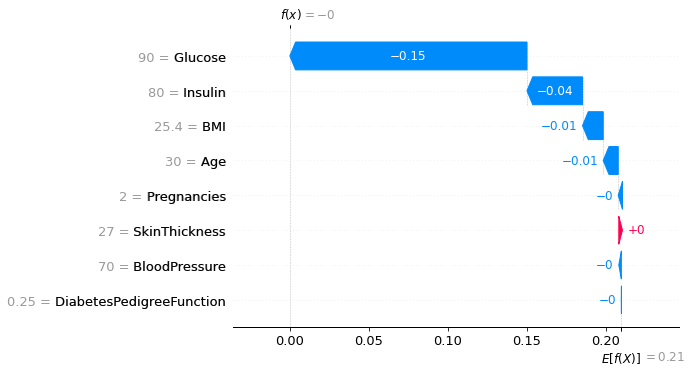

In [10]:
# Use SHAP to explain the model's prediction for the user's input
explainer = shap.Explainer(svm.predict, X_train)
shap_values = explainer(user_input)

# Visualize the SHAP values
shap.plots.waterfall(shap_values[0], max_display=8)